In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ms1437","key":"63130a52ae12e192adbcf44be47fbb3f"}'}

In [ ]:
api_token = {"username":"ms1437","key":"63130a52ae12e192adbcf44be47fbb3f"}
import json
import zipfile
import os

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

 99% 669M/675M [00:07<00:00, 130MB/s]
100% 675M/675M [00:07<00:00, 90.6MB/s]


In [ ]:
#from __future__ import absolute_import, division, print_function
import numpy as np 
import pandas as pd 
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

In [ ]:
import os
import zipfile

local_zip = '/content/cell-images-for-detecting-malaria.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
infected = os.listdir('/content/cell_images/cell_images/Parasitized/') 
uninfected = os.listdir('/content/cell_images/cell_images/Uninfected/')

In [ ]:
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("/content/cell_images/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("/content/cell_images/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated45 = resize_img.rotate(45)
        rotated75 = resize_img.rotate(75)
        data.append(np.array(resize_img))
        data.append(np.array(rotated45))
        data.append(np.array(rotated75))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')

In [ ]:
cells = np.array(data)
labels = np.array(labels)

np.save('Cells' , cells)
np.save('Labels' , labels)

In [ ]:
print('Cells : {} | labels : {}'.format(cells.shape , labels.shape))

Cells : (96453, 50, 50, 3) | labels : (96453,)


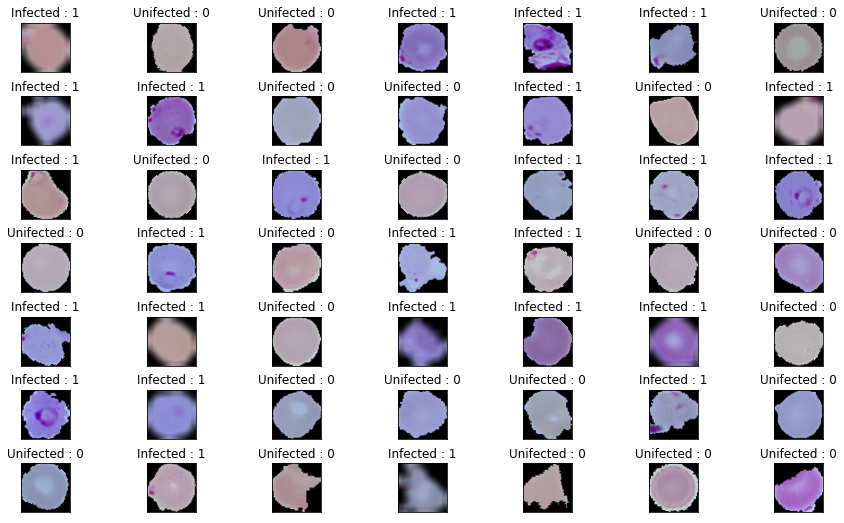

In [ ]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , cells.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(cells[r[0]])
    plt.title('{} : {}'.format('Infected' if labels[r[0]] == 1 else 'Unifected' ,
                               labels[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

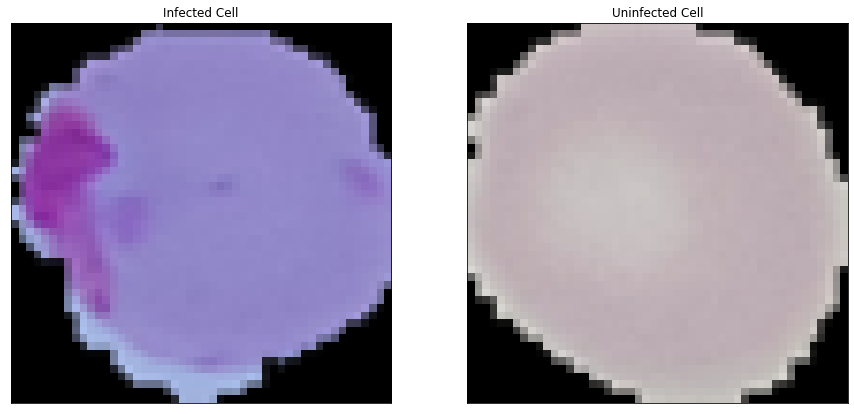

In [ ]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cells[0])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cells[60000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [ ]:
n = np.arange(cells.shape[0])
np.random.shuffle(n)
cells = cells[n]
labels = labels[n]

In [ ]:
cells = cells.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells/255

In [ ]:
from sklearn.model_selection import train_test_split

train_x , x , train_y , y = train_test_split(cells , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

eval_x , test_x , eval_y , test_y = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

In [ ]:
print('train data shape {} ,eval data shape {} , test data shape {}'.format(train_x.shape,
                                                                           eval_x.shape ,
                                                                           test_x.shape))

train data shape (77162, 50, 50, 3) ,eval data shape (9645, 50, 50, 3) , test data shape (9646, 50, 50, 3)


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, GlobalMaxPool2D, Conv2D, MaxPool2D, Flatten


# Feature Extraction Layer
model1 = Sequential()
model1.add(InputLayer(input_shape = [50,50,3]))
# model1.add(Conv2D(filters=8, kernel_size=3, strides=1, padding='same', activation='relu'))
# model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=2, padding='same'))
# model1.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
# model1.add(MaxPool2D(pool_size=2, padding='same'))
# model1.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
# model1.add(MaxPool2D(pool_size=2, padding='same'))
# model1.add(Conv2D(filters=512, kernel_size=3, strides=1, padding='same', activation='relu'))
# model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(GlobalMaxPool2D())
model1.add(Flatten())

# Fully Connected Layer

model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

# Summary Scenario Pertama

print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0

In [ ]:
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [ ]:
Sc1 = model1.fit(test_x, test_y, batch_size=32, epochs=30, validation_data=(eval_x, eval_y))

Epoch 1/30
302/302 [==============================] - 33s 111ms/step - loss: 0.2285 - acc: 0.9093 - val_loss: 0.1263 - val_acc: 0.9599
Epoch 2/30
302/302 [==============================] - 33s 110ms/step - loss: 0.1380 - acc: 0.9542 - val_loss: 0.1147 - val_acc: 0.9632
Epoch 3/30
302/302 [==============================] - 34s 111ms/step - loss: 0.1214 - acc: 0.9605 - val_loss: 0.1468 - val_acc: 0.9527
Epoch 4/30
302/302 [==============================] - 34s 113ms/step - loss: 0.1224 - acc: 0.9596 - val_loss: 0.1126 - val_acc: 0.9628
Epoch 5/30
302/302 [==============================] - 33s 110ms/step - loss: 0.1082 - acc: 0.9629 - val_loss: 0.1345 - val_acc: 0.9590
Epoch 6/30
302/302 [==============================] - 33s 109ms/step - loss: 0.1079 - acc: 0.9632 - val_loss: 0.1587 - val_acc: 0.9514
Epoch 7/30
302/302 [==============================] - 33s 110ms/step - loss: 0.1018 - acc: 0.9659 - val_loss: 0.1063 - val_acc: 0.9644
Epoch 8/30
302/302 [==============================] - 3

In [ ]:
from sklearn.metrics import classification_report

pred = model1.predict(eval_x)
labels = (pred > 0.5).astype(np.int)

print(classification_report(eval_y, labels))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4192
           1       0.98      0.95      0.96      5453

    accuracy                           0.96      9645
   macro avg       0.96      0.96      0.96      9645
weighted avg       0.96      0.96      0.96      9645



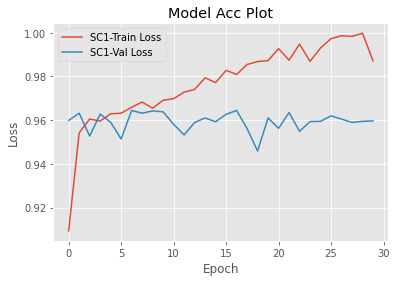

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,30), Sc1.history["acc"], label="SC1-Train acc")
plt.plot(np.arange(0,30), Sc1.history["val_acc"], label="SC1-Val acc")
plt.title("Model Acc Plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()